# Plan for today

1. Introduction to Linear Regression
2. Best Fit Line Optimization
3. Polynomial Regression and Feature Pipelines
4. Multivariable Linear Regression
5. Practical - Heart Risk Level Prediction Web Application

# Regression

1. Regression predictive modeling is the task of approximating a mapping function (f) from input variables(X) to a continuous output variable(y).
2. A continuous output variable is a real-value, such as a n integer or floating point value. These are often quantities, suchas amounts and sizes.
3. For example,a house may be predicted to sell for a specific dollar value, perhaps in the range of $100,000 to $200,000.

## Regression Algorithms
1. Linear regression
2. Support Vector Machines
3. Random forest regression

# Linear Regression
1. Regression is a method of modelling a target value based on independent predictors.
2. This method is mostly used for forecasting and finding out cause and effect relationship between variables.
3. Regression techniques mostly differ based on the number of independent variables and the type of relation ship between the independent and dependent variables.
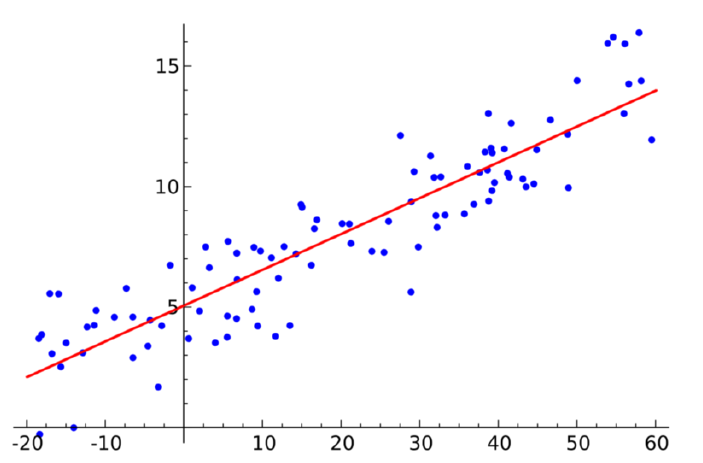

# Weight and Height example

In [20]:
import pandas as pd

dataset=pd.read_csv('weight-vs-height.csv').values
print(dataset)

[[ 55 120]
 [ 65 130]
 [ 45 119]
 [ 67 125]
 [ 90 150]
 [ 92 170]
 [ 95 180]
 [ 80 176]
 [ 70 150]
 [ 75 152]]


In [21]:
data=dataset[:,0].reshape(-1,1)
target=dataset[:,1].reshape(-1,1)

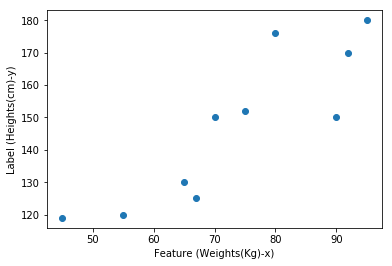

In [22]:
from matplotlib import pyplot as plt

plt.scatter(data,target)
plt.xlabel('Feature (Weights(Kg)-x)')
plt.ylabel('Label (Heights(cm)-y)')

# How Linear Regression Works
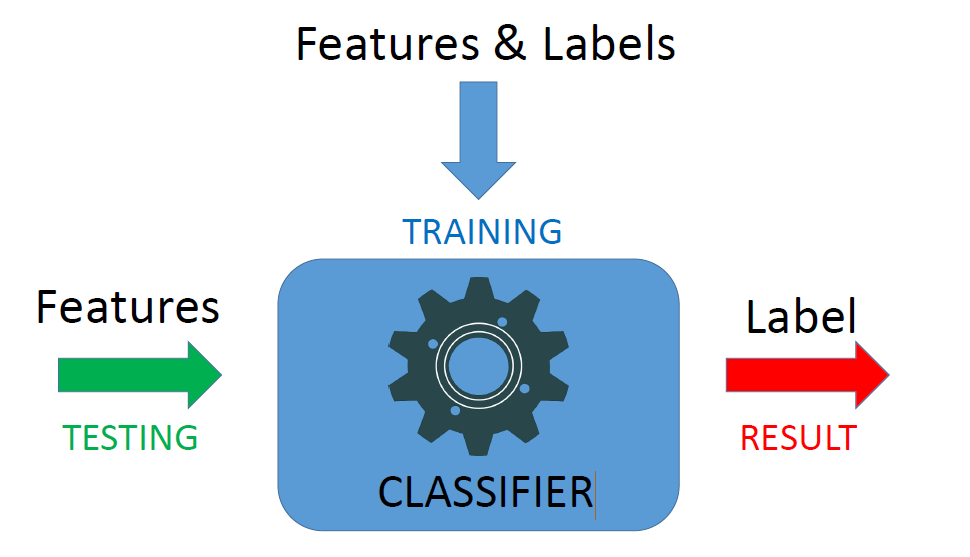

# Linear Regression finds a best fit line

In [27]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [29]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(train_data,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
print('m:',model.coef_)
print('c:',model.intercept_)

m: [[1.22800519]]
c: [56.74939804]


In [33]:
m=model.coef_[0][0]
c=model.intercept_[0]
print(m,c)

1.2280051861455825 56.74939803667344


In [36]:
import numpy as np

xvals=np.arange(40,100)
yvals=m*xvals+c

In [39]:
xb=[[85]]
yb=model.predict(xb)
print('yb:',yb)

yb: [[161.12983886]]


In [42]:
# Manually using m,c
ybmanual=m*85+c
print('ybmanual:',ybmanual)

ybmanual: 161.12983885904794


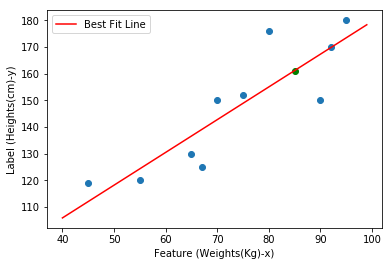

In [40]:
plt.scatter(data,target)
plt.plot(xvals,yvals,'r',label='Best Fit Line')
plt.scatter(xb,yb,c='g')
plt.xlabel('Feature (Weights(Kg)-x)')
plt.ylabel('Label (Heights(cm)-y)')
plt.legend()
plt.show()

# Formula of the Best Fit Line
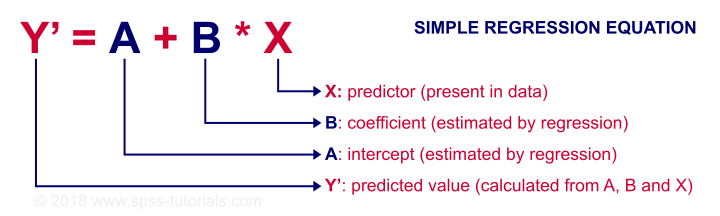

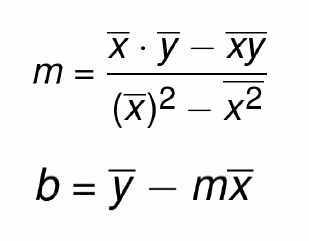

# Optimal Best Fit Line Minimizing the sum of errors
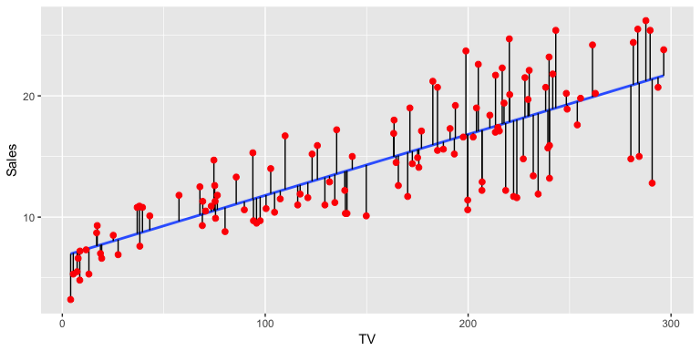

# Proof
[towardsdatascience.com](https://towardsdatascience.com/linear-regression-derivation-d362ea3884c2)

# Dealing with higher dimensional polynomial functions
1. This data clearly cannot be well described by a straight line,
2. Still, we can fit a line to the data using Linear Regression and get the optimal result:
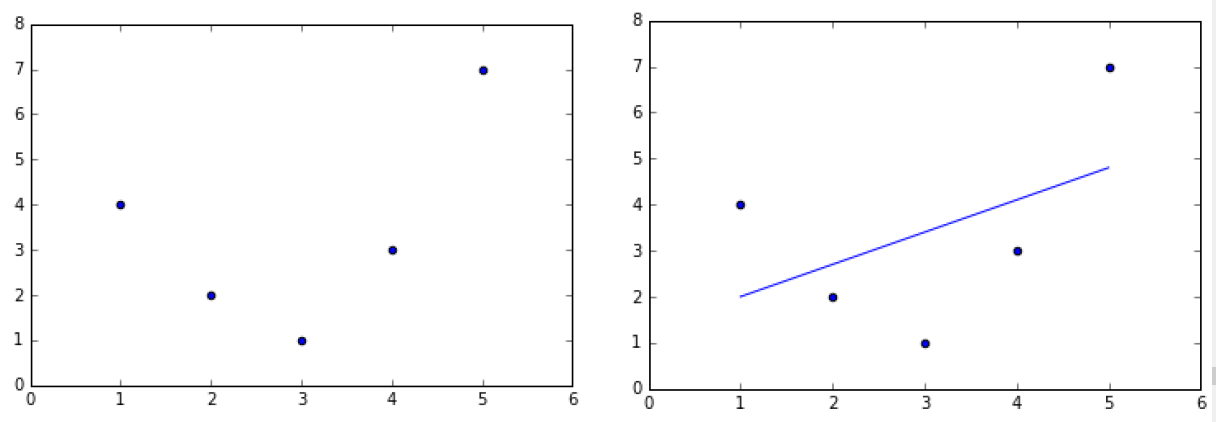

In [48]:
dataset=pd.read_csv('none-linear-dataset.csv').values
print(dataset)

[[ -9. 102.]
 [ -8. 112.]
 [ -7.  72.]
 [ -6.  46.]
 [ -5.  70.]
 [ -4.  57.]
 [ -3.  28.]
 [ -2.  12.]
 [ -1.  36.]
 [  0.  21.]
 [  1.   9.]
 [  2.   7.]
 [  3.  37.]
 [  4.  30.]
 [  5.  40.]
 [  6.  44.]
 [  7.  97.]
 [  8.  76.]
 [  9.  90.]]


In [54]:
data=dataset[:,0].reshape(-1,1)
target=dataset[:,1].reshape(-1,1)

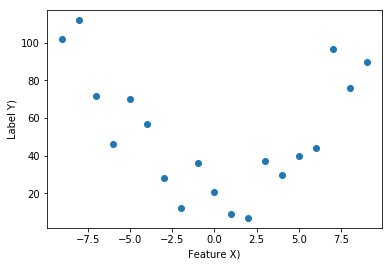

In [55]:
plt.scatter(data,target)
plt.xlabel('Feature X)')
plt.ylabel('Label Y)')
plt.show()

In [56]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [57]:
model=LinearRegression()
model.fit(train_data,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
print('m:',model.coef_)
print('c:',model.intercept_)

m: [[-0.62812368]]
c: [55.22702245]


In [59]:
m=model.coef_[0][0]
c=model.intercept_[0]
print(m,c)

-0.6281236764083016 55.22702244811521


In [62]:
xvals=np.arange(-10,10)
yvals=m*xvals+c

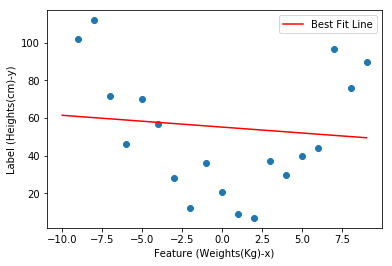

In [64]:
plt.scatter(data,target)
plt.plot(xvals,yvals,'r',label='Best Fit Line')
plt.xlabel('Feature (Weights(Kg)-x)')
plt.ylabel('Label (Heights(cm)-y)')
plt.legend()
plt.show()

In [67]:
## Solution - Adding another Feature (Higher Dimension)
x1=dataset[:,0].reshape(-1,1)
print('x1:',x1)
x2=np.power(x1,2)
print('x2:',x2)

x1: [[-9.]
 [-8.]
 [-7.]
 [-6.]
 [-5.]
 [-4.]
 [-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]]
x2: [[81.]
 [64.]
 [49.]
 [36.]
 [25.]
 [16.]
 [ 9.]
 [ 4.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 4.]
 [ 9.]
 [16.]
 [25.]
 [36.]
 [49.]
 [64.]
 [81.]]


In [69]:
data_new=np.append(x1,x2,axis=1)
print(data_new)

[[-9. 81.]
 [-8. 64.]
 [-7. 49.]
 [-6. 36.]
 [-5. 25.]
 [-4. 16.]
 [-3.  9.]
 [-2.  4.]
 [-1.  1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]
 [ 6. 36.]
 [ 7. 49.]
 [ 8. 64.]
 [ 9. 81.]]


In [70]:
train_data,test_data,train_target,test_target=train_test_split(data_new,target,test_size=0.1)

In [71]:
model=LinearRegression()
model.fit(train_data,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
print('coefs:',model.coef_)
print('c:',model.intercept_)

coefs: [[-0.90378428  1.06244234]]
c: [20.02537813]


In [77]:
a1=model.coef_[0][0]
a2=model.coef_[0][1]
a0=model.intercept_[0]

In [78]:
xvals=np.arange(-10,10)
yvals=a1*xvals+a2*np.power(xvals,2)+a0

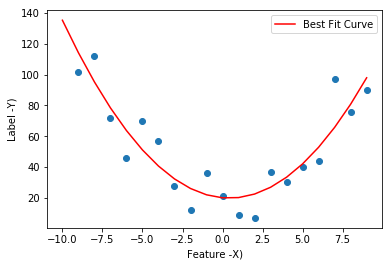

In [79]:
plt.scatter(data,target)
plt.plot(xvals,yvals,'r',label='Best Fit Curve')
plt.xlabel('Feature -X)')
plt.ylabel('Label -Y)')
plt.legend()
plt.show()

# Solution - Polynomial Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions. The PolynomialRegression pipeline used in Hyperparameters and Model Validation and Feature Engineering. The idea is to take our multidimensional linear model:
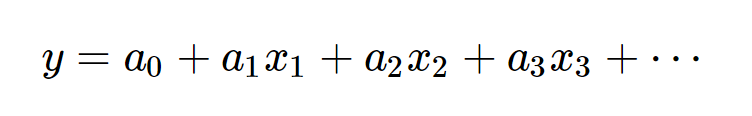

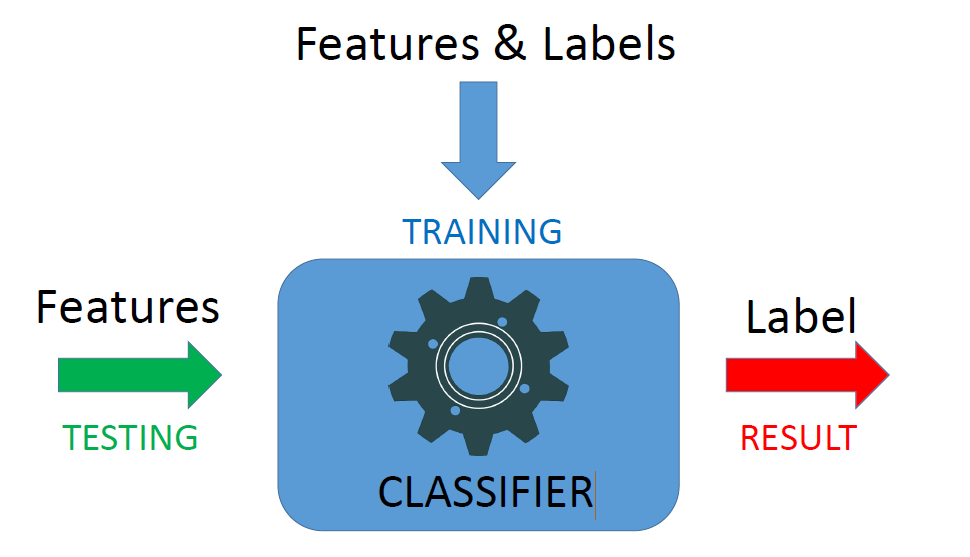

In [80]:
dataset=pd.read_csv('none-linear-dataset.csv').values
print(dataset)

[[ -9. 102.]
 [ -8. 112.]
 [ -7.  72.]
 [ -6.  46.]
 [ -5.  70.]
 [ -4.  57.]
 [ -3.  28.]
 [ -2.  12.]
 [ -1.  36.]
 [  0.  21.]
 [  1.   9.]
 [  2.   7.]
 [  3.  37.]
 [  4.  30.]
 [  5.  40.]
 [  6.  44.]
 [  7.  97.]
 [  8.  76.]
 [  9.  90.]]


In [82]:
data=dataset[:,0].reshape(-1,1)
target=dataset[:,1].reshape(-1,1)
print('data:',data)
print('target:',target)

data: [[-9.]
 [-8.]
 [-7.]
 [-6.]
 [-5.]
 [-4.]
 [-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]]
target: [[102.]
 [112.]
 [ 72.]
 [ 46.]
 [ 70.]
 [ 57.]
 [ 28.]
 [ 12.]
 [ 36.]
 [ 21.]
 [  9.]
 [  7.]
 [ 37.]
 [ 30.]
 [ 40.]
 [ 44.]
 [ 97.]
 [ 76.]
 [ 90.]]


In [86]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,include_bias=False)
data_new=poly.fit_transform(data)

print('data_new:',data_new)

data_new: [[-9. 81.]
 [-8. 64.]
 [-7. 49.]
 [-6. 36.]
 [-5. 25.]
 [-4. 16.]
 [-3.  9.]
 [-2.  4.]
 [-1.  1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]
 [ 6. 36.]
 [ 7. 49.]
 [ 8. 64.]
 [ 9. 81.]]


In [88]:
model=LinearRegression()
model.fit(train_data,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
print('m:',model.coef_)
print('c:',model.intercept_)

m: [[-0.90378428  1.06244234]]
c: [20.02537813]


# How to decide the degree when using polynomial features
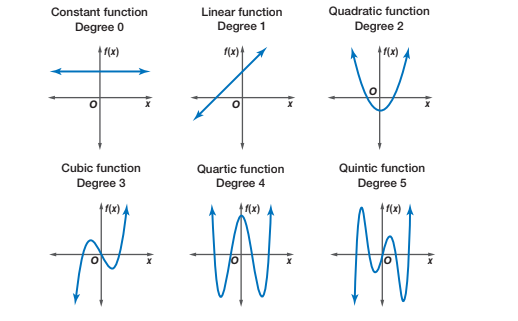

# Multi variable Linear Regression
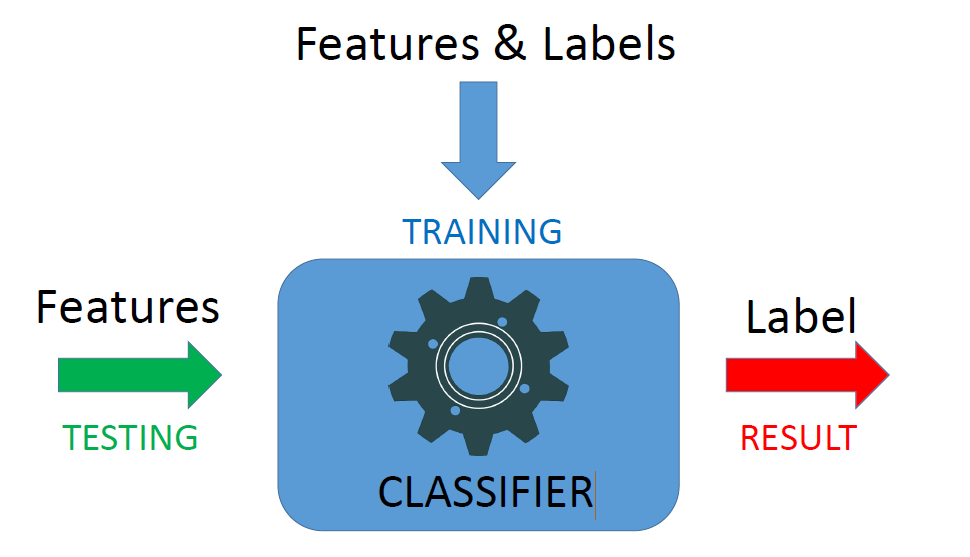

In [90]:
dataset=pd.read_csv('cardio_dataset.csv').values
print(dataset)

[[  2.   48.  236.  ...   2.    0.    1.1]
 [  1.   48.  260.  ...   2.    1.    7. ]
 [  1.   44.  187.  ...   2.    0.    7. ]
 ...
 [  1.   65.  212.  ...   1.    0.   30.6]
 [  1.   66.  184.  ...   1.    0.   23.8]
 [  2.   45.  203.  ...   2.    0.    1. ]]


In [91]:
data=dataset[:,0:7]
target=dataset[:,7]
print('data:',data)
print('target:',target)

data: [[  2.  48. 236. ...   0.   2.   0.]
 [  1.  48. 260. ...   0.   2.   1.]
 [  1.  44. 187. ...   1.   2.   0.]
 ...
 [  1.  65. 212. ...   1.   1.   0.]
 [  1.  66. 184. ...   0.   1.   0.]
 [  2.  45. 203. ...   0.   2.   0.]]
target: [ 1.1  7.   7.  ... 30.6 23.8  1. ]


In [92]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [93]:
model=LinearRegression()
model.fit(train_data,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
print('coef:',model.coef_)
print('a0:',model.intercept_)

coef: [-4.89426688  0.73063906  0.02558128 -0.06700623  5.73209669 -5.23189535
 11.00736767]
a0: -17.668788637527342


In [95]:
predicted_target=model.predict(test_data)

In [98]:
print('Actaul:',test_target[:10])
print('Predicted:',predicted_target[:10])

Actaul: [ 5.3  4.9 30.9 14.6  2.7 16.9  3.5  6.5 19.3  3.2]
Predicted: [ 8.44726881  7.19674698 18.55695221 17.79521473  7.21230332 20.39999998
  4.55101912 -0.09164883 22.0833769   2.02739599]


# R Squared and Coefficient of Determination Theory 
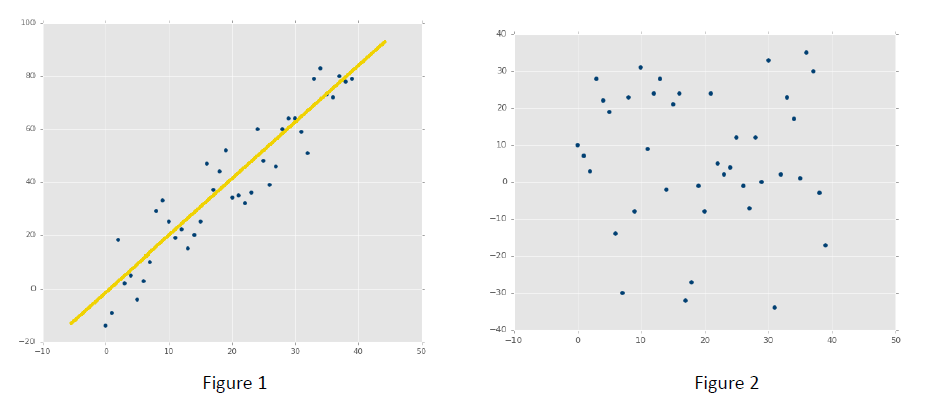
1. In the second image,there is a best fit line,though even the best fitting line is still going to be useless,
2. And we'd like to know that before we spend precious computational power on it.
3. The standard way to check for errors is by using squared errors.You will hear this method either called Rsquared or the coefficient of determination.

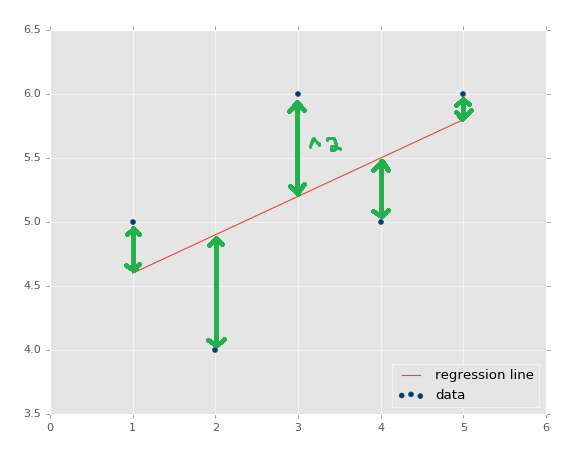

The distance between the regression line's y values, and the data's y values is the error, then we square that. The line's squared error is either a mean or a sum of this, we'll simply sum it.
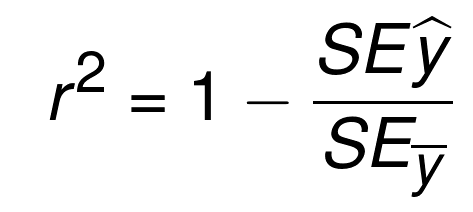
1. The equation is essentially 1 minus the division of the squared error of the regression line and the squared error of the mean y line.
2. The goal is to have the r squared value, otherwise called the coefficient of determination, as closeto 1 as possible.

In [102]:
from sklearn.metrics import r2_score

r2=r2_score(test_target,predicted_target)
print('r2:',r2)

r2: 0.772842074911859


In [104]:
import joblib

joblib.dump(model,'heart-risk-reg-model.sav')

['heart-risk-reg-model.sav']

# Python Web Frameworks
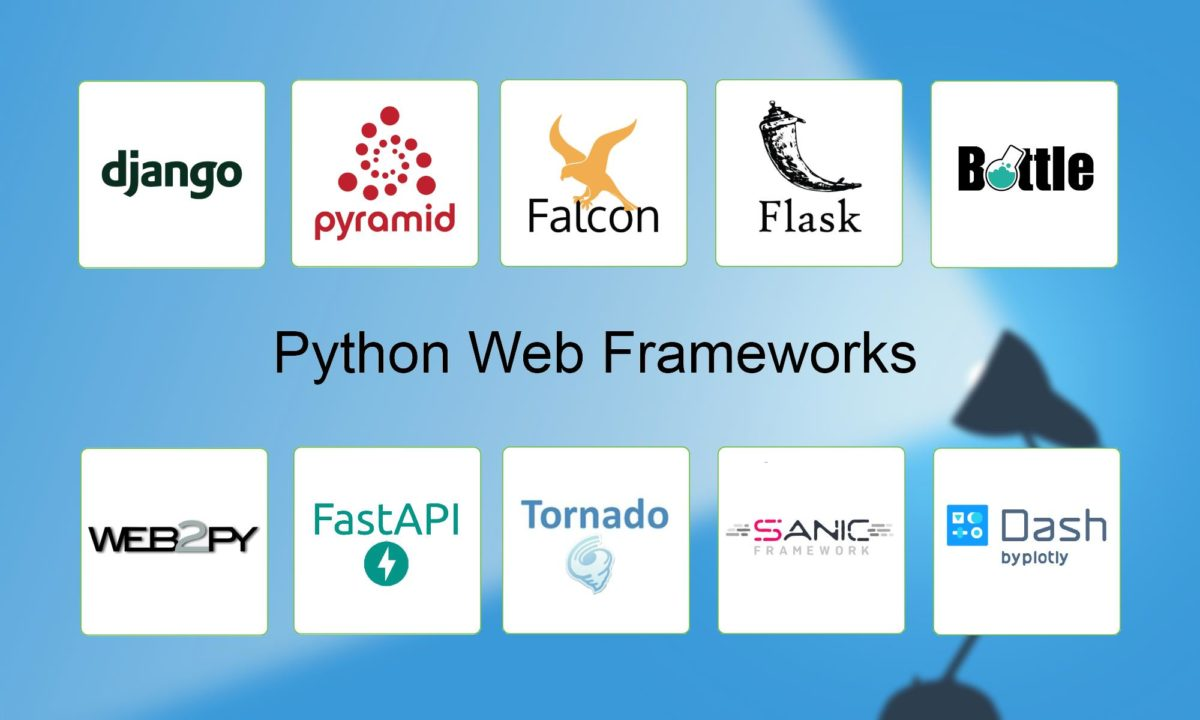